# KAGGLE REVIEWS DE GOOGLE

## Swietenia Naomi Medina Gasca

### 20 de junio de 2025

## Paso 1. cargar datos

In [ ]:
import kagglehub
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("denizbilginn/google-maps-restaurant-reviews")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/google-maps-restaurant-reviews


In [ ]:
#manipular el archivo descargado
df=pd.read_csv(path+"/reviews.csv")
#este metodo es para imprimir los primeros 5 registros
df.head()

,business_name,author_name,text,photo,rating,rating_category
0,Haci'nin Yeri - Yigit Lokantasi,Gulsum Akar,We went to Marmaris with my wife for a holiday...,dataset/taste/hacinin_yeri_gulsum_akar.png,5,taste
1,Haci'nin Yeri - Yigit Lokantasi,Oguzhan Cetin,During my holiday in Marmaris we ate here to f...,dataset/menu/hacinin_yeri_oguzhan_cetin.png,4,menu
2,Haci'nin Yeri - Yigit Lokantasi,Yasin Kuyu,Prices are very affordable. The menu in the ph...,dataset/outdoor_atmosphere/hacinin_yeri_yasin_...,3,outdoor_atmosphere
3,Haci'nin Yeri - Yigit Lokantasi,Orhan Kapu,Turkey's cheapest artisan restaurant and its f...,dataset/indoor_atmosphere/hacinin_yeri_orhan_k...,5,indoor_atmosphere
4,Haci'nin Yeri - Yigit Lokantasi,Ozgur Sati,I don't know what you will look for in terms o...,dataset/menu/hacinin_yeri_ozgur_sati.png,3,menu


## Paso 2. Transformar

In [ ]:
#Obtener información del DT
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   business_name    1100 non-null   object
 1   author_name      1100 non-null   object
 2   text             1100 non-null   object
 3   photo            1100 non-null   object
 4   rating           1100 non-null   int64 
 5   rating_category  1100 non-null   object
dtypes: int64(1), object(5)
memory usage: 51.7+ KB


In [ ]:
#revisar si existen datos nulos
df.isnull().sum()

,0
business_name,0
author_name,0
text,0
photo,0
rating,0
rating_category,0


In [ ]:
#borrar espacios en blanco y convertimos el texto a minusculas
df['text']=df['text'].str.strip().str.lower()

# Paso 3. Análisis de datos

**-▶ Promedio de calificaciones por sucursal**

In [ ]:
df.groupby('business_name')['rating'].mean().sort_values(ascending=False)

,rating
business_name,
Pizzeria Remo,4.545455
Haci'nin Yeri - Yigit Lokantasi,4.454545
Churchill Bistro,4.454545
Bunbun Kas,4.454545
Yesemek,4.454545
...,...
Mado,3.181818
Baskent Aspava,3.090909
Medeniyetler Sofrasi,3.000000


**-▶ Distribución por calificaciones**

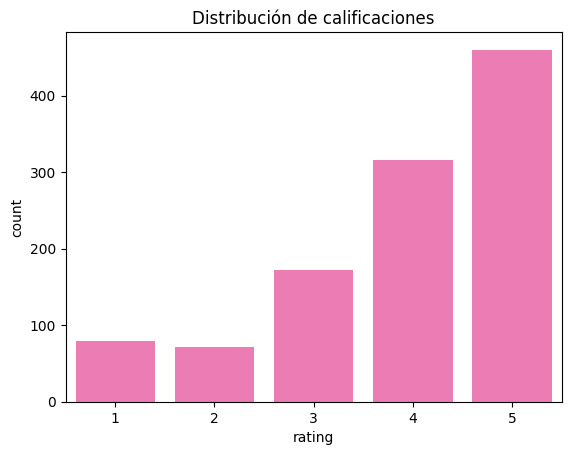

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#creamos la gráfica de barras
sns.countplot(x='rating',data=df, color='hotpink')
plt.title('Distribución de calificaciones')
plt.show()

**-▶ Nube de etiquetas de reseñas**

ejemplo para análisis de datos cualitativos

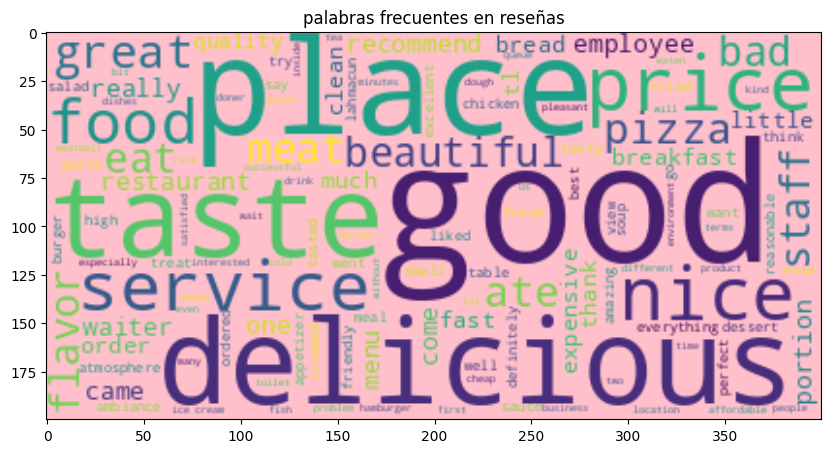

In [ ]:
from wordcloud import WordCloud
resena=" ".join(df['text'].dropna())
wc=WordCloud(background_color='pink').generate(resena)

plt.figure(figsize=(10,8))
plt.imshow(wc, interpolation='BILINEAR')
plt.title("palabras frecuentes en reseñas")
plt.show()